In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
import shap
pd.set_option('display.max_columns', None)

In [10]:
# load data
df = pd.read_csv('../data/dataset.csv')
df = df.sort_values(by=['Season', 'Player_id'])
categorical_features = ['Club_id', 'Competition', 'Liga', 'Liga_level', 'international']
df[categorical_features] = df[categorical_features].astype('category')
# and drop the name column (becasue it cant handle strings that are not categorical)
df = df.drop(columns=['name'])
df = df.query('MarketValue > 0.1')

# load model
model = CatBoostRegressor()
model.load_model('model/catboost_model.cbm')

In [11]:
test = df[df['Season'] == 2022]
x_test = test.drop(['MarketValue'], axis=1)
y_test = test['MarketValue']

In [12]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

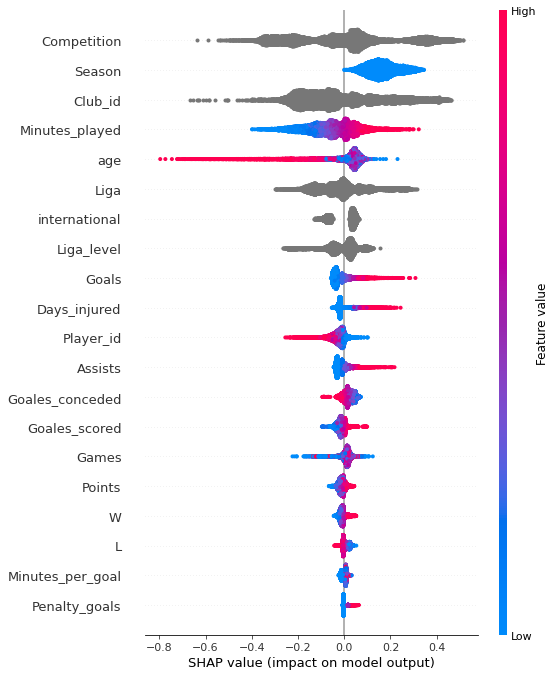

In [13]:
shap.summary_plot(shap_values, x_test)

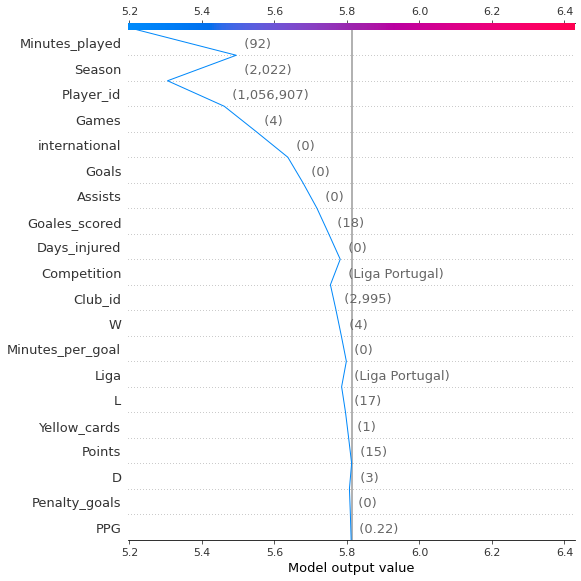

In [14]:
shap.decision_plot(explainer.expected_value, shap_values[-2,:], x_test.iloc[-2,:])